# sunstardb long example

This notebook contains an extended example of the sunstardb application programming interfaces (APIs).  The focus is on "data discovery", that is on methods to find out what are the contents of the database.

## import libraries

First we load libraries which will be useful for this exercise.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import astropy
import sunstardb.database
import IPython.display

In [3]:
%matplotlib inline

## connect to the database

This command establishes a connection to the sunstardb database, which is implemented in PostgreSQL.

In [4]:
db = sunstardb.database.SunStarDB()

## data types

These are the kinds of data contained in the database.  They may come from various sources.

In [5]:
dtypes = db.fetchall_datatypes()
print("N datatypes", len(dtypes))
dtypes

N datatypes 9


id,name,struct,units,description
int64,str14,str10,object,str566
1,S_mean,MEASURE,None,"Mount Wilson Observatory S-index, a ratio of CaII H and K line core and continuum intensities."
2,S,TIMESERIES,None,"Mount Wilson Observatory S-index, a ratio of CaII H and K line core and continuum intensities."
3,Pcyc,MEASURE,years,Period of magnetic activity cycle.
4,Pcyc2,MEASURE,years,Second most significant period from an indice of the magnetic activity cycle.
5,activity_class,LABEL,None,"Description of a star's long-term magnetic activity, as defined by Baliunas et al. 1995. Values are either ""cycling"" for a measured activity cycle, ""cycling2"" for two significant activity cycles, ""variable"" for signficant variablity without pronounced periodicity, on timescales longer than 1 yr but shorter than 25 yr (mean fractional variance of S-index greater than 2%). ""flat"" means a mean fractional variance of S-index less than 1%-1.5%. ""flat?"" means a mean fractional variance of 1.5%-2%. ""long"" means signficant variability on timescales longer than 25 yr."
10,logRpHK,TIMESERIES,None,Ratio of CaII H and K line core flux due to chromospheric emission to bolometric flux
11,by,TIMESERIES,mag,"Stromgren photometry bands b and y, combined as an average (b+y)/2"
12,Prot,MEASURE,days,Period of rotation.
13,logRpHK_mean,MEASURE,None,Ratio of CaII H and K line core flux due to chromospheric emission to bolometric flux


## data sources

A 'source' represents the format the data was in immediately before being inserted into sunstardb.  Most come from data files (`kind='FILE'`), but processed results directly from code are another possibility (`kind='CODE'`).  The `name` is a unique identifier of the data package which was read into sunstardb.

In [6]:
sources = db.fetchall_sources()
print("N sources", len(sources))
sources

N sources 19


id,name,kind,version,origin,source,source_time,insert_time
int64,str20,str4,object,int64,object,object,object
1,Baliunas1995,FILE,None,1,None,2014-09-18 20:28:12,2014-11-07 15:02:32.592585
132,Gaidos2000,FILE,None,111,None,2016-02-11 17:09:58,2016-02-11 17:10:45.847451
9,Duncan1991,FILE,None,9,None,2014-11-07 15:08:18,2014-11-07 15:16:51.076503
19,SMARTS_HK,FILE,None,16,None,2014-12-05 14:46:14,2014-12-05 14:46:14.882798
143,Petit2008,FILE,None,122,None,2016-02-12 12:16:13,2016-02-12 12:16:57.563765
147,Simpson2010,FILE,None,126,None,2016-02-12 14:08:17,2016-02-12 14:08:46.560031
152,Suarez_Mascareno2015,FILE,None,131,None,2016-02-12 14:43:59,2016-02-12 14:45:11.149287
154,Olah2016,FILE,None,133,None,2017-01-27 15:40:28,2017-01-27 15:40:42.427325
158,Hempelmann2016,FILE,None,135,None,2017-02-02 14:09:36,2017-02-02 14:09:36.715040


## data origins

An origin represents the provider of data inserted into sunstardb.  Most are from published tables in the literature that were transcribed to a text file which was inserted into sunstardb (e.g. `kind='PAPER'` `name='Baliunas et al. 1995'`).  Others were data files provided by persons associated with observation programs (e.g. `kind='RAW'`, `name='Willie Soon'`).

In [7]:
origins = db.fetchall_origins()
print("N origins", len(origins))
origins

N origins 19


id,name,kind,url,description,insert_time
int64,str28,str5,object,str234,object
1,Baliunas et al. 1995,PAPER,adslabs.harvard.edu/abs/1995ApJ...438..269B,"Baliunas et al., ""Chromospheric variations in main-sequence stars"", Astrophysical Journal, vol. 438, no. 1, p. 269-287, (1995)",2014-11-07 15:02:32.592585
111,Gaidos et al. 2000,PAPER,adslabs.harvard.edu/abs/2000AJ....120.1006G,"E. J. Gaidos, G. W. Henry, and S. M. Henry, ""Spectroscopy and Photometry of Nearby Young Solar Analogs"", Astrophysical Journal, vol. 120, no. 2, p. 1006-1013, (2000)",2016-02-11 17:10:45.847451
126,Simpson et al. 2010,PAPER,adslabs.harvard.edu/abs/2010MNRAS.408.1666S,"Simpson et al., ""Rotation periods of exoplanet host stars"", Monthly Notices of the Royal Astronomical Society, Volume 408, Issue 3, pp. 1666-1679 (2010)",2016-02-12 14:08:46.560031
9,VizieR III/159A,WEB,http://cdsarc.u-strasbg.fr/viz-bin/Cat?III/159A,"CaII H and K measurements made at Mount Wilson Observatory, 1966-1983",2014-11-07 15:16:51.076503
137,Donahue et al. 1997,PAPER,adslabs.harvard.edu/abs/1997SoPh..171..191D,"R. A. Donahue, A. K. Dobson, and S. L. Baliunas, ""Stellar Active Region Evolution - I. Estimated Lifetimes of Chromospheric Active Regions and Active Region Complexes"", Solar Physics, v. 171, Issue 1, p. 191-209. (1997)",2017-02-03 15:10:47.803152
13,Willie Soon,RAW,None,"Received via email from Willie Soon <wsoon@cfa.harvard.edu> on Oct 10, 2014",2014-11-07 15:45:07.959384
16,SMARTS HK Data Website,WEB,http://gemelli.spacescience.org/~trme9702/HK/,"SMARTS HK data published in home directory of Travis Metcalfe <travis@spsci.org>, retrieved Oct 28, 2014",2014-11-07 15:51:18.230304
18,Jeffrey Hall,RAW,None,"Received via email from Jeffrey Hall <jch@lowell.edu> on Nov 14, 2014",2014-11-18 10:38:18.780504
135,Hempelmann et al. 2016,PAPER,adslabs.harvard.edu/abs/2016A&A...586A..14H,"Hempelmann et al. ""Measuring rotation periods of solar-like stars using TIGRE. A study of periodic CaII H+K S-index variability"", Astronomy & Astrophysics, Volume 586, id.A14, 19 pp. (2016)",2017-02-02 13:31:44.470250


## instruments

Most of the data in sunstardb comes from observation programs.  The instrument responsible for obtaining the data is associated with each datum.

In [8]:
instruments = db.fetchall_instruments()
print("N instruments", len(instruments))
instruments

N instruments 10


id,name,long,url,description,insert_time
int64,str16,str53,str64,str4,object
1,MWO-HK,Mount Wilson Observatory H-K Project,http://www.mtwilson.edu/hk/,TODO,2014-11-07 15:02:31.066051
2,SMARTS-HK,SMARTS 1.5 m telescope CSPEC + L1K,http://gemelli.spacescience.org/~trme9702/HK/,TODO,2014-11-07 15:02:31.066051
3,SSS,Solar Stellar Spectrograph,http://www2.lowell.edu/users/jch/sss/index.php,TODO,2014-11-18 10:32:43.681545
4,Keck HIRES,Keck Observatory High Resolution Echelle Spectrometer,http://www2.keck.hawaii.edu/inst/hires/,TODO,2015-01-15 11:07:11.618892
5,HARPS,High Accuracy Radial Velocity Planet Searcher,http://www.eso.org/sci/facilities/lasilla/instruments/harps.html,TODO,2015-01-20 18:28:46.494184
6,Fairborn APT T4,Fairborn Automated Photometric Telescope T4 (0.75 m),http://schwab.tsuniv.edu/t4.html,TODO,2015-02-17 11:28:38.808606
7,Fairborn APT T3,Fairborn Automated Photometric Telescope T3 (0.40 m),http://schwab.tsuniv.edu/t3.html,TODO,2016-02-11 16:51:44.147206
8,NARVAL,Observatoire du Pic du Midi NARVAL spectropolarimeter,http://www.ast.obs-mip.fr/projets/narval/v1/,TODO,2016-02-12 11:54:05.184881
9,Fairborn APT T11,Fairborn Automated Photometric Telescope T11 (0.80 m),http://schwab.tsuniv.edu/t11.html,TODO,2016-02-12 14:07:16.376686


## stars

Each datum is associated with a particular star.  This primitive API returns the contents of the `star` table directly.

**TODO: Develop a more user-friendly way of accessing the known stars**.

In [9]:
stars = db.fetch_starlist()
print("N stars", len(stars))
stars[0:3]

N stars 1374


[[1,
  'Sun',
  '00 00 0.0 +00 00 0.0',
  0.0,
  0.0,
  datetime.datetime(2014, 11, 7, 15, 2, 32, 592585)],
 [2,
  '* 9 Cet',
  '00 22 51.7884 -12 12 33.969',
  5.715785,
  -12.2094358333333,
  datetime.datetime(2014, 11, 7, 15, 2, 32, 592585)],
 [3,
  'HD 2454',
  '00 28 20.0517 +10 11 23.450',
  7.08354875,
  10.1898472222222,
  datetime.datetime(2014, 11, 7, 15, 2, 32, 592585)]]

## Properties

A `property` is a single datum in sunstardb.  It declares that a given `datatype` exists for a `star`, from the associated `source`, `origin`, and `instrument`.  This primitive API returns the contents of the `property` table directly, which is simply a collection of integer keys.

**TODO: Develop a more user-friendly way of accessing properties.**.

In [10]:
props = db.fetchall_properties()
print("N properties", len(props))
props[0:3]

N properties 1191


[[1, 1, 1, 1, 1, 1, datetime.datetime(2014, 11, 7, 15, 2, 32, 592585)],
 [2, 2, 1, 1, 1, 1, datetime.datetime(2014, 11, 7, 15, 2, 32, 592585)],
 [3, 3, 1, 1, 1, 1, datetime.datetime(2014, 11, 7, 15, 2, 32, 592585)]]

## Datasets

A dataset is a collection of properties that consists of unique `star`, `datatype` pairs.  Essentially, it is a table of data with non-redundant entries for each data type.  A dataset is automatically generated from each data source (above), which creates a table identical to the data source.

**TODO: In the future, datasets will be added which correspond to published collections of heterogeneous measurements, for example that of Saar & Brandenburg 1999 and Bohm-Vitense 2007.**

In [11]:
dsets = db.fetchall_datasets()
print("N datasets", len(dsets))
dsets

N datasets 19


id,name,description,insert_time
int64,str20,str71,object
1,Baliunas1995,Dataset automatically generated from data source 'Baliunas1995',2014-11-07 15:02:32.592585
2,Duncan1991,Dataset automatically generated from data source 'Duncan1991',2014-11-07 15:16:51.076503
7,SMARTS_HK,Dataset automatically generated from data source 'SMARTS_HK',2014-12-05 14:46:14.882798
9,Isaacson2010,Dataset automatically generated from data source 'Isaacson2010',2015-01-19 15:59:29.824817
10,HARPS,Dataset automatically generated from data source 'HARPS',2015-01-20 18:32:53.963037
15,FairbornAPT,Dataset automatically generated from data source 'FairbornAPT',2015-02-17 11:50:38.293245
17,SSS,Dataset automatically generated from data source 'SSS',2015-10-01 13:55:54.261018
20,MWO_HK,Dataset automatically generated from data source 'MWO_HK',2016-02-03 15:25:08.017729
25,Baliunas1996,Dataset automatically generated from data source 'Baliunas1996',2016-02-10 12:12:45.036267


### Fetching a dataset and displaying a feature-rich table

Below we fetch the contents of one of the datasets and use the `astropy.table.Table` method `show_in_notebook()` to render the table as a paginated, sortable, searchable HTML table.  Clicking on the column name sorts the table, entering text in the search field filters results.  For example, type "flat" to show only the flat-activity stars in Baliunas et al. 1995.

In [12]:
b95 = db.fetch_data_table('Baliunas1995', ['S_mean', 'activity_class', 'Pcyc'])
b95.show_in_notebook(display_length=10)

idx,star,S_mean,activity_class,Pcyc
0,Sun,0.179,cycle,10.0
1,* 9 Cet,0.349,cycle,9.1
2,HD 2454,0.17,var,None
3,* 14 Cet,0.224,cycle,4.9
4,HR 159,0.183,var,None
5,* 54 Psc,0.176,cycle,13.8
6,HD 3795,0.156,var,None
7,HD 4628,0.23,cycle,8.37
8,* 44 And,0.194,var,None
9,HR 448,0.136,long,None


## Filtering dataset tables

Filtering can be done programatically as well, in the usual way for `astropy` tables or `numpy` arrays.  Here we filter out the flat-activity stars and plot them in a histogram along with the full distribution.

Text(0.5,0,'S-index')

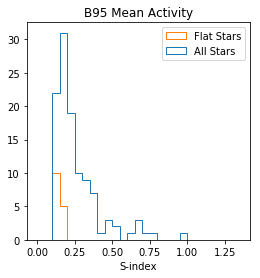

In [13]:
sel_flats = b95['activity_class'] == 'flat' # select the flat stars
flats = b95[sel_flats]

# Plot histogram of activity, highlighting the flat-activity stars
plt.figure(figsize=(4,4))
bins = np.arange(0., 1.4, 0.05)
plt.hist([b95['S_mean'], flats['S_mean']], bins, histtype='step', label=['All Stars', 'Flat Stars'])
plt.legend()
plt.title("B95 Mean Activity")
plt.xlabel('S-index')

## Client-side joining dataset tables

Multiple datasets can be joined together client-side.  In astronomy parlance this is known as "cross-matching", but it is done more directly here by the star name.

In [14]:
# Fetch the rotation periods from the Donahue1996 dataset
d96_rots = db.fetch_data_table('Donahue1996', ['Prot'])

# Join the cycle and rotation data on the star name and display the results
cycrots = astropy.table.join(b95, d96_rots, keys=['star'])
cycrots.show_in_notebook(display_length=10)

idx,star,S_mean,activity_class,Pcyc,Prot
0,* 107 Psc,0.198,cycle,9.6,35.2
1,* 11 LMi,0.284,cycle,7.9,18.6
2,* 111 Tau,0.332,long,None,3.56
3,* 12 Oph,0.339,cycle,17.4,21.07
4,* 15 Sge,0.194,cycle,2.6,13.94
5,* 36 Oph A,0.375,var,None,20.69
6,* 36 Oph B,0.384,cycle,5.7,21.11
7,* 61 Cyg A,0.658,cycle,7.3,35.37
8,* 61 Cyg B,0.986,cycle,11.7,37.84
9,* 61 UMa,0.311,var,None,16.68


The results of the join can be plotted inline.

Text(0.5,1,'Cycle Period vs Rotation Period')

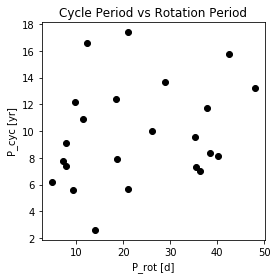

In [15]:
# Plot cycle period versus rotation period
plt.figure(figsize=(4,4))
plt.plot(cycrots['Prot'], cycrots['Pcyc'], 'ko')
plt.xlabel('P_rot [d]')
plt.ylabel('P_cyc [yr]')
plt.title("Cycle Period vs Rotation Period")

## Fetching Time Series

Time series may be accessed with the `fetch_timeseries` method.  To find which stars have time series in the database, the `fetch_starlist` method is used.  In this example we fetch and display three time series from the MWO HK Project.

* 9 Cet         N_obs=1013 t_start=1966-08-05T08:13:16.603 t_end=2002-11-24T08:13:16.134
HD 115043       N_obs= 393 t_start=1983-06-12T08:28:37.377 t_end=2002-05-23T08:14:31.488
V* HN Peg       N_obs=1455 t_start=1966-05-31T07:19:42.266 t_end=2002-09-21T08:25:04.528


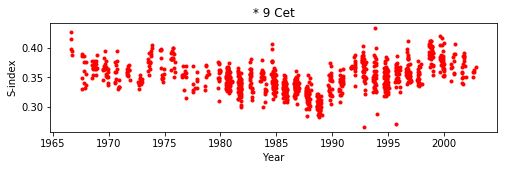

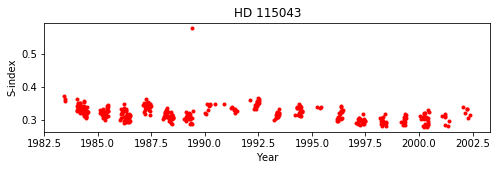

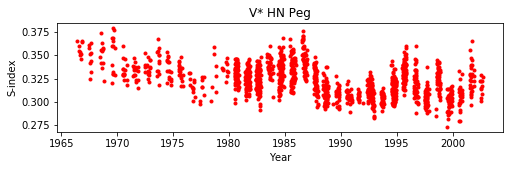

In [16]:
# Get the list of stars which have timeseries data from the MWO_HK source
mwo_stars = db.fetch_starlist('timeseries', source='MWO_HK')

# Iterate through the list, print statistics and plot
for star in mwo_stars[0:3]: # Limit to 3 for this example
    starname = star['name']
    
    # Fetch the time series from sunstardb
    ts_mwo = db.fetch_timeseries('S', starname, source='MWO_HK')
    # Convert time axis from 'datetime' object to astropy.time.Time
    t_mwo = astropy.time.Time(ts_mwo['obs_time'], format='datetime')
    S_mwo = ts_mwo['S']
    # Print statistics
    print("%-15s N_obs=%4i t_start=%s t_end=%s" % (starname, S_mwo.size, t_mwo[0].isot, t_mwo[-1].isot))
    
    # Plot timeseries
    plt.figure(figsize=(8,2))
    plt.plot(t_mwo.decimalyear, S_mwo, 'r.')
    plt.title(starname)
    plt.xlabel('Year')
    plt.ylabel('S-index')